# Optimization

Not all problems have closed form opimization results. Instead, we have to rely on algorithms to numerically optmize our parameteris.
To fix our discussion, let $l(\theta)$ be a negative log likelihood or loss function that we want to minimize. Equivalently, they
could be the log likelihood or the negative of a loss function (gain function) that we want to optimize. Since we'll be focusing
on machine learning, we'll characterize the problem in the terms of minimization, since most ML algoirthms are focused on minmizing
loss functions.

Consider how we would normally minimize a function. We would typically find the root of the derivative. That is, solving
$l'(\theta) = 0$. However, finding the root simply creates an equally hard problem. What about approximating
$l'(\theta)$ with a line at the current estimate? That is,
$$
l'(\theta) \approx l'\left(\theta^{(0)}\right) + \left(\theta - \theta^{(0)}\right)l''\left(\theta^{(0)}\right)  = 0,
$$
with the approximation being motivated by Taylor's theorem, where $l''$ is the Hessian (second derivative matrix). Solving the right hand equality implies
$$
\theta^{(1)} = \theta^{(0)} - l''\left(\theta^{(0)}\right)^{-1} l'\left(\theta^{(0)}\right).
$$
The algorithm that then recenters the approximation at $\theta^{(1)}$ and performs another update and so on, is called Newton's algorithm,
which, as its name implies is a very old technique. This algorithm takes the form of heading in the opposite direction of the
gradient ($- l'\left(\theta^{(0)}\right)$) where the scale of the move is governed by the inverse of the second derivative.

As an example, consider the function $l(\theta) = \theta^p$  for $p$ an even number $\geq 2$. Then $l'(\theta) = p\theta^{p-1}$ and $l''(\theta) = p(p-1) \theta^{p-2}$. Then,
the update is
$$
\theta^{(1)} = \theta^{(0)} - \theta^{(0)} / (p - 1) = \theta^{(0)} (p-2)/(p-1)
$$
implying $\theta^{(n)} = \theta^{(0)} [(p-2)/ (p - 1)]^n$, which clearly converges to 0, the minimum. It converges in one iteration at $p=2$. The size of the jump at which one moves along the linear
approximation is the inverse of the second derivative, i.e. $1 / [p(p-1) \theta^{p-2}]$.  Thus, one moves more the less convex $l$ is around the minimum. In this case, this results in a convergence rate of $[(p-2) / (p - 1)]^{n}$.

Let's try it out for $p=4$. Here's the core of the code:

```
p = 4
while (error > tolerance):
    theta = theta - theta / (p-1)
```

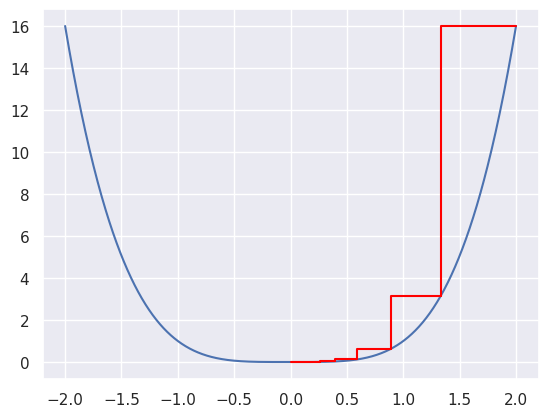

In [ ]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

p = 4
theta = 2
noiter = int(1e3)
thetavals = np.linspace(-2, 2, 1000)
plt.plot(thetavals, thetavals ** p)
for i in range(noiter):
    step = theta / (p-1)
    plt.plot([theta, theta - step, theta - step],
             [theta ** p, theta ** p, (theta - step) ** p ], color = 'red')
    theta = theta - step
plt.show()

In [ ]:
#!Rscript -e 'install.packages("pscl", repos="https://cloud.r-project.org")' &> /dev/null

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cloud.r-project.org/src/contrib/pscl_1.5.9.tar.gz'
Content type 'application/x-gzip' length 3019215 bytes (2.9 MB)
downloaded 2.9 MB

* installing *source* package ‘pscl’ ...
** package ‘pscl’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C compiler: ‘gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0’
gcc -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -ffile-prefix-map=/build/r-base-14Q6vq/r-base-4.3.3=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c IDEAL.c -o IDEAL.o
gcc -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -ffile-prefix-map=/build/r-base-14Q6vq/r-base-4.3.3=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2  -c bayesreg.c -o bayesreg.o
gcc -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -ffile-prefix-map=/build/r-base-14Q6vq/r-base-4.3

## Example

Poisson regression makes for a good example. Consider a model where $Y_i \sim \mbox{Poisson}(\mu_i)$ where
$\log(\mu_i) = x_i^t \theta$ for covariate vector $x_i$. Then the negative log-likelihood associated with the data up to additive constants in $\theta$ is:

$$
l(\theta) = -\sum_{i=1}^n \left[
  y_i x_i^t \theta - e^{x_i^t \theta} \right]
$$

Thus,
$$
l'(\theta) = -\sum_{i=1}^n \left[y_i x_i -  e^{x_i^t \theta} x_i\right]
= - \mathbf{X}^t \mathbf{y} + \mathbf{X}^t e^{\mathbf{X}^t \theta}
$$
$$
l''(\theta) = \sum_{i=1}^n e^{x_i^t \theta} x_i x_i^t = \mathbf{X}^t \mathrm{Diag}\left(e^{\mathbf{X}^t \theta}\right) \mathbf{X}
$$
where $\mathbf{X}$ contains rows $x_i^t$ and $e^{\mathbf{X}^t \theta}$ is a vector with elements
$\mathbf{X}^t \theta$. Therefore, the update function to go from the current value of $\theta$ to the next is:

$$
U(\theta) = \theta +
\left[\mathbf{X}^t \mathrm{Diag}\left(e^{\mathbf{X}^t \theta}\right) \mathbf{X}\right ]^{-1} \mathbf{X}^t \left[ \mathbf{y} - e^{\mathbf{X}^t \theta}\right].
$$
Thus, our update shifts the current value by a fit from a weighted linear model. In this case, the linear
model has outcome $\mathbf{y} - e^{\mathbf{X}^t \theta}$ (which is $\mathbf{y} - E_\theta[\mathbf{y}]$) design matrix $\mathbf{X}$ and weights
$e^{\mathbf{X}^t \theta}$ (which are $\mathrm{Var}_\theta(\mathbf{Y})$).

Consider an example using the Prussian Horse Kick data. We'll use `rpy2` to
load the data in from R and plot it. We'll group the data over other variables and simply
fit a Poisson loglinear model with just an intercept and slope term.

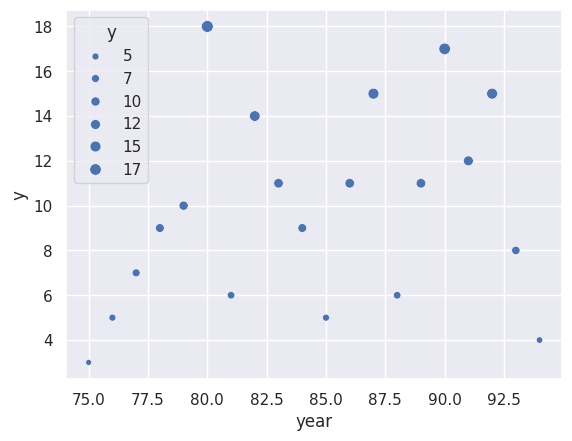

In [ ]:
from rpy2.robjects.packages import importr, data
from rpy2.robjects.pandas2ri import py2rpy, rpy2py
sns.set()

pscl = importr('pscl')
prussian_r = data(pscl).fetch('prussian')['prussian']
prussian = rpy2py(prussian_r).drop('corp', axis = 1).groupby('year').sum().reset_index()

sns.scatterplot(x = 'year', y = 'y',  size = 'y', data = prussian);

First let's fit the model using `statsmodels` and print out the coeficients. We normalize the year variable as

$$
\frac{\mbox{Year} - \min(\mbox{Year})}{\max(\mbox{Year}) - \min(\mbox{Year})}.
$$

So our slope coefficient is the proprotion of the total years under study rather than the raw year. This is done for several reasons. It helps us visualize the likelihood for one. Secondly, this is normal practice in deep learning to put coefficients on a common scale to help the algorithms have more unit-free starting points.

In [ ]:
from statsmodels.discrete.discrete_model import Poisson
prussian['itc'] = 1
prussian['year_normalized'] = (prussian['year'] - prussian['year'].min()) / (prussian['year'].max() - prussian['year'].min())

y = prussian['y'].to_numpy()
x = prussian[ ['itc', 'year_normalized'] ].to_numpy()
out = Poisson(endog = y, exog = x, ).fit()
print(out.summary())

Optimization terminated successfully.
         Current function value: 2.921766
         Iterations 4
                          Poisson Regression Results                          
Dep. Variable:                      y   No. Observations:                   20
Model:                        Poisson   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Sat, 27 Apr 2024   Pseudo R-squ.:                 0.01919
Time:                        14:50:57   Log-Likelihood:                -58.435
converged:                       True   LL-Null:                       -59.579
Covariance Type:            nonrobust   LLR p-value:                    0.1305
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0983      0.145     14.502      0.000       1.815       2.382
x1             0.3565      0.

Now, let's define the variables and fit the model using `numpy`. The error is the norm of the step size for that iteration.

In [ ]:
error = np.inf
tolerance = .0001
theta = np.array([0, 1])
nosteps = 0
while (error > tolerance):
    eta = x @ theta
    mu = np.exp(eta)
    var = np.linalg.inv(x.transpose() @ np.diag(mu) @ x)
    step =  var @ x.transpose() @ (y - mu)
    theta = theta + step
    error = np.linalg.norm(step)
    nosteps += 1
print( [theta, nosteps])

[array([2.09827498, 0.35652129]), 10]


Notice we get the same answer as the optimization routine in `statsmodels`. In this
setting, the second derivative is more than just useful for fast optimization. Specifically, we can get the standard error of the coefficients witht the square root of the diagonal  of the $\left[\mathbf{X}^t \mathrm{Diag}\left(e^{\mathbf{X}^t \theta}\right) \mathbf{X}\right ]^{-1}$ term on convergence. This is the empirical estimate of the asymptotic standard error for the MLE.

In [ ]:
print(np.sqrt(np.diag(var)))

[0.14469197 0.23618894]


Here's the likelihood, which is very narrow, and the path of the estimates as Newton's algorithm runs.

In [1]:
def like(theta):
    eta = x @ np.array(theta)
    like = eta * y - np.exp(eta)
    return np.exp( np.sum(like) )

beta0_vals = np.linspace(2.0983 - 2 * 0.145, 2.0983 + 2 * 0.145, 100)
beta1_vals = np.linspace(0.3565 - 2 * 0.236, 0.3565 + 2 * 0.236, 100)

l = [ [like([beta0, beta1]) for beta1 in beta1_vals] for beta0 in beta0_vals]

#plt.imshow(l)
plt.contour(beta0_vals, beta1_vals, l)

error = np.inf
tolerance = .001
theta = np.array([ 2.0983 + 2 * 0.145, 0.3565 + 2 * 0.236])
nosteps = 0
while (error > tolerance):
    eta = x @ theta
    mu = np.exp(eta)
    var = np.linalg.inv(x.transpose() @ np.diag(mu) @ x)
    step =  var @ x.transpose() @ (y - mu)
    theta = theta + step
    error = np.linalg.norm(step)
    nosteps += 1
    plt.plot( [ (theta - step)[0], theta[0]]  , [ (theta - step)[1], theta[1]], color = "blue")

plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.show()

NameError: name 'np' is not defined

## Gradient descent
Often, we can't calculate a second derivative, as will be the case with neural networks.
We then replace the step size in Newton's algorithm with a less optimal step size:
$$
\theta^{(1)} = \theta^{(0)} - \epsilon \times l'\left(\theta^{(0)}\right)
$$
where $\epsilon$ is the so-called ``learning rate''.

Consider our example of trying to minimize $\theta^p$. Then, our update is
$$
\theta^{(1)} = \theta^{(0)} - \epsilon \times p \left[\theta^{(0)}\right]^{p-1}.
$$

Let's try it out for a few different values of $\epsilon$. The core of the code is simply:

```
epsilon = .01
for i in range(noiter):
    theta = theta - epsilon * p * theta ** (p-1)
```

Here we show the convergence for $\epsilon = .1$ (blue line), $\epsilon = .01$ (red line) and $\epsilon = .001$ (green line).

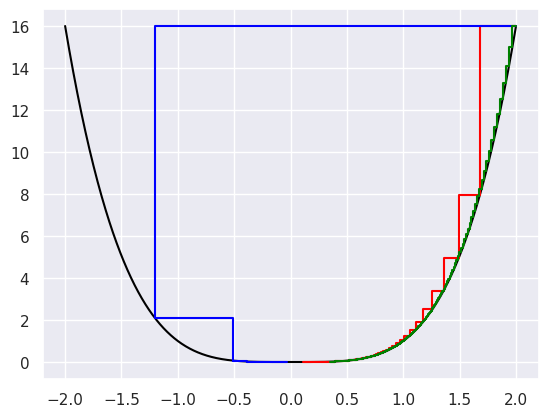

In [ ]:
p = 4
theta = 2
epsilon = 1e-2
noiter = int(1e3)
thetavals = np.linspace(-2, 2, 1000)
plt.plot(thetavals, thetavals ** p, color = 'black')

for i in range(noiter):
    step = epsilon * p * theta ** (p-1)
    plt.plot([theta, theta - step, theta - step],
             [theta ** p, theta ** p, (theta - step) ** p ], color = 'red')
    theta = theta - step

theta = 2
epsilon = 1e-1
for i in range(noiter):
    step = epsilon * p * theta ** (p-1)
    plt.plot([theta, theta - step, theta - step],
             [theta ** p, theta ** p, (theta - step) ** p ], color = 'blue')
    theta = theta - step

theta = 2
epsilon = .001
for i in range(noiter):
    step = epsilon * p * theta ** (p-1)
    plt.plot([theta, theta - step, theta - step],
             [theta ** p, theta ** p, (theta - step) ** p ], color = 'green')
    theta = theta - step


plt.show()

## Example revisited with gradient descent

Let's run the same data throw the gradient descent algorithm rather than Newton's method.
Here we set the learning rate to b 0.001 for a thousand iterations. The gist of the code is simply:

In [ ]:
import numpy
epsilon = .001
for i in range(1000):
    eta = x @ theta
    mu = np.exp(eta)
    step =  - epsilon * x.transpose() @ (y - mu)
    theta = theta - step

In [ ]:
theta

array([2.09827498, 0.35652129])

Stopping the algorithm is a little trickier for gradient descent, since the change at each iteration is dependent on the learning rate. Small learning rates will lead to small step sizes. Here's a plot of the covergence on top of contours of the likelihood.

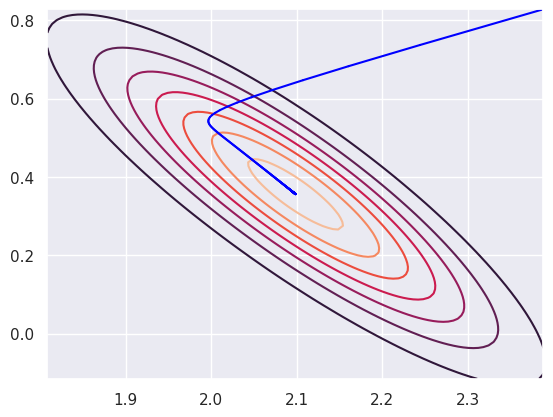

In [ ]:
#| echo: false

plt.contour(beta0_vals, beta1_vals, l)
epsilon = .001
theta = np.array([ 2.0983 + 2 * 0.145, 0.3565 + 2 * 0.236])
for i in range(1000):
    eta = x @ theta
    mu = np.exp(eta)
    step =  epsilon * x.transpose() @ (y - mu)
    theta = theta + step
    plt.plot( [ (theta - step)[0], theta[0]]  ,
              [ (theta - step)[1], theta[1]],
              color = "blue")

plt.show()